✅ Using 'total_sleep_hours' as sleep duration column with advanced features added.
📊 Generated columns: date, HKCategoryValueSleepAnalysisAsleepCore, HKCategoryValueSleepAnalysisAsleepDeep, HKCategoryValueSleepAnalysisAsleepREM, HKCategoryValueSleepAnalysisAsleepUnspecified, HKCategoryValueSleepAnalysisAwake, sleep_duration, sleep_change, avg_7d_sleep, avg_14d_sleep, sleep_debt, sleep_consistency, bedtime_hour, wake_hour, bedtime_variability, weekday, is_weekend, sleep_efficiency
Model R²: 0.079
RMSE: 3.44 hours

🧠 AI Sleep Recommendations:
 - Predicted to sleep 7.1h tonight. You're currently getting 8.1h, consider lighter evening activity or earlier wake-up.


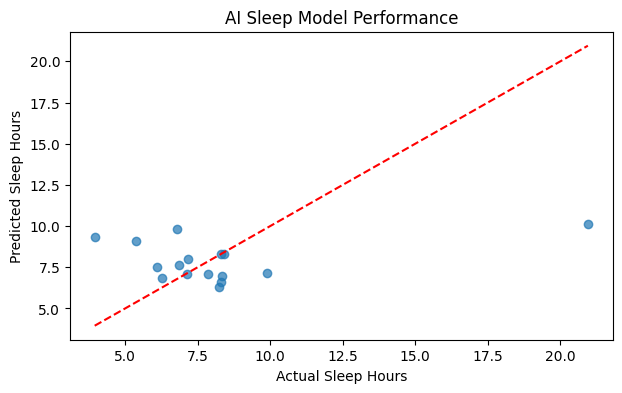

In [12]:
import sys, os
sys.path.append(os.path.abspath("../src"))

import pandas as pd
from ai_sleep import engineer_features, train_sleep_model, generate_recommendations

# Load processed data
daily_sleep = pd.read_csv("results/daily_sleep_summary.csv")
sleep_df = pd.read_csv("results/sleep_df.csv")

# Engineer features
feature_df = engineer_features(daily_sleep, sleep_df)

# Train AI model
model, X_test, y_test, preds = train_sleep_model(feature_df)

# Generate AI recommendations
recs, pred_sleep = generate_recommendations(feature_df, model)

print("\n🧠 AI Sleep Recommendations:")
for r in recs:
    print(" -", r)

# Plot predicted vs actual sleep
import matplotlib.pyplot as plt
plt.figure(figsize=(7,4))
plt.scatter(y_test, preds, alpha=0.7)
plt.xlabel("Actual Sleep Hours")
plt.ylabel("Predicted Sleep Hours")
plt.title("AI Sleep Model Performance")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()
